In [ ]:
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org ydata-profiling
#!pip install missingno --trusted-host pypi.org --trusted-host files.pythonhosted.org
#!pip install plotly --trusted-host pypi.org --trusted-host files.pythonhosted.org
#!pip install ipywidgets --trusted-host pypi.org --trusted-host files.pythonhosted.org
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn
#!pip install statsmodels
#!pip install  ydata_profiling
#!pip install missingno
import pandas as pd
import warnings
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from ydata_profiling import ProfileReport
import missingno as msno


In [ ]:
#Cargo los datos
from google.colab import drive
drive.mount('/content/drive')
main_directory_path = '/content/drive/My Drive/MaestriaStudying/Unsupervised/Proyecto/'


archivo_2020_1 = main_directory_path+'data/Saber_11__2020-1_20240828.csv'
archivo_2020_2= main_directory_path+'data/Saber_11__2020-2_20240828.csv'


saber_2020_1 = pd.read_csv(archivo_2020_1)
saber_2020_2 = pd.read_csv(archivo_2020_2)


saber_2020 = pd.concat([saber_2020_1, saber_2020_2], ignore_index=True)

saber_2020.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,CC,COLOMBIA,F,01/01/1985,20201,SB11202010045555,ESTUDIANTE,COLOMBIA,No,CESAR,...,36.0,7,A-,164,2.0,VALIDEZ OFICINA JURÍDICA,GENERACION E - GRATUIDAD,NaN,NaN,NaN
1,CC,COLOMBIA,F,01/01/1995,20201,SB11202010045719,ESTUDIANTE,COLOMBIA,No,NARIÑO,...,30.0,3,A-,202,10.0,PUBLICAR,GENERACION E - GRATUIDAD,NaN,NaN,NaN
2,CC,COLOMBIA,F,01/01/1997,20201,SB11202010070662,ESTUDIANTE,COLOMBIA,Si,CAUCA,...,30.0,3,A-,162,2.0,PUBLICAR,GENERACION E - GRATUIDAD,NaN,NaN,NaN
3,CC,COLOMBIA,F,01/01/2001,20201,SB11202010069926,ESTUDIANTE,COLOMBIA,No,PUTUMAYO,...,37.0,8,A-,188,6.0,PUBLICAR,NO,NaN,NaN,NaN
4,CC,COLOMBIA,F,02/01/2001,20201,SB11202010023181,ESTUDIANTE,COLOMBIA,No,RISARALDA,...,80.0,80,B+,274,39.0,PUBLICAR,NO,NaN,NaN,NaN


In [ ]:
missing_summary = pd.DataFrame({
    'Missing Count': saber_2020.isnull().sum(),
    'Missing Percentage': (saber_2020.isnull().sum() / len(saber_2020)) * 100
})

# mostrar valores faltantes
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# ordernarlos
missing_summary = missing_summary.sort_values(by='Missing Count', ascending=False)

# Display
display(missing_summary)

,Missing Count,Missing Percentage
COLE_BILINGUE,85622,16.456054
ESTU_NSE_INDIVIDUAL,29380,5.646666
ESTU_INSE_INDIVIDUAL,29380,5.646666
FAMI_COMECEREALFRUTOSLEGUMBRE,21811,4.191948
FAMI_TIENECOMPUTADOR,21616,4.154470
FAMI_TRABAJOLABORPADRE,21147,4.064331
FAMI_TIENEAUTOMOVIL,19264,3.702430
ESTU_TIPOREMUNERACION,19104,3.671678
FAMI_TRABAJOLABORMADRE,19059,3.663030
FAMI_TIENECONSOLAVIDEOJUEGOS,18929,3.638044


In [ ]:
from datetime import datetime
import re

# Buscar formato fecha
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y')
    except ValueError:
        try:
            return pd.to_datetime(date_str, format='%m/%d/%Y %I:%M:%S %p')
        except ValueError:
            return date_str

# Aplicar funcion a fecha nacimiento
saber_2020['ESTU_FECHANACIMIENTO'] = saber_2020['ESTU_FECHANACIMIENTO'].apply(parse_date)

# Cacular edad
def calculate_age(birth_date):
    if isinstance(birth_date, pd.Timestamp):
        today = datetime.now()
        age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
        return age
    else:
        return None

# Calculate age using the new function
saber_2020['AGE'] = saber_2020['ESTU_FECHANACIMIENTO'].apply(calculate_age)

In [ ]:
saber_2020.drop('ESTU_FECHANACIMIENTO', axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
# Seleccionamos las columnas de interés
columns_of_interest = [
    'ESTU_NACIONALIDAD',
    'ESTU_GENERO',
    'AGE',
    'PERIODO',
    'ESTU_TIENEETNIA',
    'ESTU_COD_RESIDE_DEPTO',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_PERSONASHOGAR',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'FAMI_TIENEINTERNET',
    'FAMI_TIENECONSOLAVIDEOJUEGOS',
    'FAMI_NUMLIBROS',
    'ESTU_DEDICACIONLECTURADIARIA',
    'ESTU_DEDICACIONINTERNET',
    'ESTU_HORASSEMANATRABAJA',
    'COLE_CODIGO_ICFES',
    'COLE_GENERO',
    'COLE_NATURALEZA',
    'COLE_CALENDARIO',
    'COLE_CARACTER',
    'COLE_AREA_UBICACION',
    'COLE_JORNADA',
    'COLE_COD_DEPTO_UBICACION'
]

# Dividimos columnas en categóricas y numericas
saber_2020_subset = saber_2020[columns_of_interest]

categorical_columns = [
    'ESTU_NACIONALIDAD',
    'ESTU_GENERO',
    'ESTU_TIENEETNIA',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_PERSONASHOGAR',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'FAMI_TIENEINTERNET',
    'FAMI_TIENECONSOLAVIDEOJUEGOS',
    'FAMI_NUMLIBROS',
    'ESTU_DEDICACIONLECTURADIARIA',
    'ESTU_DEDICACIONINTERNET',
    'ESTU_HORASSEMANATRABAJA',
    'COLE_GENERO',
    'COLE_NATURALEZA',
    'COLE_CALENDARIO',
    'COLE_CARACTER',
    'COLE_AREA_UBICACION',
    'COLE_JORNADA'
]

numeric_columns = [
    'PERIODO',
    'AGE',
    'ESTU_COD_RESIDE_DEPTO',
    'COLE_CODIGO_ICFES',
    'COLE_COD_DEPTO_UBICACION'
]

# Imputamos valores faltante categoricos
categorical_imputer = SimpleImputer(strategy='most_frequent')
saber_2020_subset[categorical_columns] = categorical_imputer.fit_transform(saber_2020_subset[categorical_columns])

# Imputamos valores faltante numericos
numeric_imputer = SimpleImputer(strategy='mean')
saber_2020_subset[numeric_columns] = numeric_imputer.fit_transform(saber_2020_subset[numeric_columns])

display(saber_2020_subset)

<ipython-input-7-975d11fed0aa>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saber_2020_subset[categorical_columns] = categorical_imputer.fit_transform(saber_2020_subset[categorical_columns])
<ipython-input-7-975d11fed0aa>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saber_2020_subset[numeric_columns] = numeric_imputer.fit_transform(saber_2020_subset[numeric_columns])


,ESTU_NACIONALIDAD,ESTU_GENERO,AGE,PERIODO,ESTU_TIENEETNIA,ESTU_COD_RESIDE_DEPTO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,COLE_CODIGO_ICFES,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_DEPTO_UBICACION
0,COLOMBIA,F,39.0,20201.0,No,20.0,Estrato 1,5 a 6,Primaria incompleta,Primaria incompleta,...,No Navega Internet,Más de 30 horas,57372.0,MIXTO,OFICIAL,A,TÉCNICO/ACADÉMICO,URBANO,NOCHE,20.0
1,COLOMBIA,F,29.0,20201.0,No,52.0,Estrato 2,3 a 4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,...,Entre 1 y 3 horas,0,177618.0,MIXTO,NO OFICIAL,A,ACADÉMICO,URBANO,SABATINA,52.0
2,COLOMBIA,F,27.0,20201.0,Si,19.0,Estrato 1,3 a 4,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,...,No Navega Internet,Entre 11 y 20 horas,135301.0,MIXTO,NO OFICIAL,OTRO,ACADÉMICO,URBANO,MAÑANA,19.0
3,COLOMBIA,F,23.0,20201.0,No,86.0,Estrato 1,1 a 2,Técnica o tecnológica completa,Educación profesional completa,...,Entre 1 y 3 horas,Entre 11 y 20 horas,155739.0,MIXTO,NO OFICIAL,A,TÉCNICO/ACADÉMICO,URBANO,SABATINA,86.0
4,COLOMBIA,F,23.0,20201.0,No,66.0,Estrato 6,3 a 4,Educación profesional completa,Secundaria (Bachillerato) completa,...,Más de 3 horas,0,77776.0,MIXTO,NO OFICIAL,B,ACADÉMICO,RURAL,COMPLETA,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520302,COLOMBIA,M,20.0,20204.0,No,11.0,Estrato 2,5 a 6,Técnica o tecnológica completa,Secundaria (Bachillerato) incompleta,...,Más de 3 horas,Menos de 10 horas,85548.0,MIXTO,NO OFICIAL,A,ACADÉMICO,URBANO,COMPLETA,11.0
520303,COLOMBIA,M,27.0,20204.0,No,11.0,Estrato 2,3 a 4,Primaria incompleta,Secundaria (Bachillerato) incompleta,...,Entre 30 y 60 minutos,Menos de 10 horas,143578.0,MIXTO,OFICIAL,A,ACADÉMICO,URBANO,NOCHE,11.0
520304,COLOMBIA,F,19.0,20204.0,No,11.0,Estrato 2,5 a 6,Primaria incompleta,Secundaria (Bachillerato) completa,...,Entre 1 y 3 horas,Menos de 10 horas,46698.0,MIXTO,OFICIAL,A,ACADÉMICO,URBANO,TARDE,11.0
520305,COLOMBIA,M,22.0,20204.0,No,11.0,Estrato 2,3 a 4,Secundaria (Bachillerato) incompleta,Primaria completa,...,Entre 1 y 3 horas,0,143578.0,MIXTO,OFICIAL,A,ACADÉMICO,URBANO,NOCHE,11.0


In [ ]:
missing_summary = pd.DataFrame({
    'Missing Count': saber_2020_subset.isnull().sum(),
    'Missing Percentage': (saber_2020_subset.isnull().sum() / len(saber_2020)) * 100
})

# Mostrar valores faltante a ver si quedan
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# organizar
missing_summary = missing_summary.sort_values(by='Missing Count', ascending=False)

# Display
display(missing_summary)

,Missing Count,Missing Percentage


In [ ]:
display(saber_2020_subset)

,ESTU_NACIONALIDAD,ESTU_GENERO,AGE,PERIODO,ESTU_TIENEETNIA,ESTU_COD_RESIDE_DEPTO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,COLE_CODIGO_ICFES,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_DEPTO_UBICACION
0,COLOMBIA,F,39.0,20201.0,No,20.0,Estrato 1,5 a 6,Primaria incompleta,Primaria incompleta,...,No Navega Internet,Más de 30 horas,57372.0,MIXTO,OFICIAL,A,TÉCNICO/ACADÉMICO,URBANO,NOCHE,20.0
1,COLOMBIA,F,29.0,20201.0,No,52.0,Estrato 2,3 a 4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,...,Entre 1 y 3 horas,0,177618.0,MIXTO,NO OFICIAL,A,ACADÉMICO,URBANO,SABATINA,52.0
2,COLOMBIA,F,27.0,20201.0,Si,19.0,Estrato 1,3 a 4,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,...,No Navega Internet,Entre 11 y 20 horas,135301.0,MIXTO,NO OFICIAL,OTRO,ACADÉMICO,URBANO,MAÑANA,19.0
3,COLOMBIA,F,23.0,20201.0,No,86.0,Estrato 1,1 a 2,Técnica o tecnológica completa,Educación profesional completa,...,Entre 1 y 3 horas,Entre 11 y 20 horas,155739.0,MIXTO,NO OFICIAL,A,TÉCNICO/ACADÉMICO,URBANO,SABATINA,86.0
4,COLOMBIA,F,23.0,20201.0,No,66.0,Estrato 6,3 a 4,Educación profesional completa,Secundaria (Bachillerato) completa,...,Más de 3 horas,0,77776.0,MIXTO,NO OFICIAL,B,ACADÉMICO,RURAL,COMPLETA,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520302,COLOMBIA,M,20.0,20204.0,No,11.0,Estrato 2,5 a 6,Técnica o tecnológica completa,Secundaria (Bachillerato) incompleta,...,Más de 3 horas,Menos de 10 horas,85548.0,MIXTO,NO OFICIAL,A,ACADÉMICO,URBANO,COMPLETA,11.0
520303,COLOMBIA,M,27.0,20204.0,No,11.0,Estrato 2,3 a 4,Primaria incompleta,Secundaria (Bachillerato) incompleta,...,Entre 30 y 60 minutos,Menos de 10 horas,143578.0,MIXTO,OFICIAL,A,ACADÉMICO,URBANO,NOCHE,11.0
520304,COLOMBIA,F,19.0,20204.0,No,11.0,Estrato 2,5 a 6,Primaria incompleta,Secundaria (Bachillerato) completa,...,Entre 1 y 3 horas,Menos de 10 horas,46698.0,MIXTO,OFICIAL,A,ACADÉMICO,URBANO,TARDE,11.0
520305,COLOMBIA,M,22.0,20204.0,No,11.0,Estrato 2,3 a 4,Secundaria (Bachillerato) incompleta,Primaria completa,...,Entre 1 y 3 horas,0,143578.0,MIXTO,OFICIAL,A,ACADÉMICO,URBANO,NOCHE,11.0


In [ ]:
# One-Hot Encoding para las categoricas
saber_2020_encoded = pd.get_dummies(saber_2020_subset, columns=categorical_columns, drop_first=True)
display(saber_2020_encoded)
display(saber_2020_encoded.columns.tolist())

,AGE,PERIODO,ESTU_COD_RESIDE_DEPTO,COLE_CODIGO_ICFES,COLE_COD_DEPTO_UBICACION,ESTU_NACIONALIDAD_ARABIA SAUDITA,ESTU_NACIONALIDAD_ARGENTINA,ESTU_NACIONALIDAD_ARUBA,ESTU_NACIONALIDAD_BOLIVIA,ESTU_NACIONALIDAD_BRASIL,...,COLE_CALENDARIO_OTRO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_AREA_UBICACION_URBANO,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA
0,39.0,20201.0,20.0,57372.0,20.0,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,False
1,29.0,20201.0,52.0,177618.0,52.0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,27.0,20201.0,19.0,135301.0,19.0,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
3,23.0,20201.0,86.0,155739.0,86.0,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
4,23.0,20201.0,66.0,77776.0,66.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520302,20.0,20204.0,11.0,85548.0,11.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
520303,27.0,20204.0,11.0,143578.0,11.0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
520304,19.0,20204.0,11.0,46698.0,11.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
520305,22.0,20204.0,11.0,143578.0,11.0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


['AGE',
 'PERIODO',
 'ESTU_COD_RESIDE_DEPTO',
 'COLE_CODIGO_ICFES',
 'COLE_COD_DEPTO_UBICACION',
 'ESTU_NACIONALIDAD_ARABIA SAUDITA',
 'ESTU_NACIONALIDAD_ARGENTINA',
 'ESTU_NACIONALIDAD_ARUBA',
 'ESTU_NACIONALIDAD_BOLIVIA',
 'ESTU_NACIONALIDAD_BRASIL',
 'ESTU_NACIONALIDAD_CABO VERDE',
 'ESTU_NACIONALIDAD_CANADÁ',
 'ESTU_NACIONALIDAD_CHILE',
 'ESTU_NACIONALIDAD_CHINA',
 'ESTU_NACIONALIDAD_COLOMBIA',
 'ESTU_NACIONALIDAD_COREA DEL NORTE',
 'ESTU_NACIONALIDAD_COREA DEL SUR',
 'ESTU_NACIONALIDAD_COSTA RICA',
 'ESTU_NACIONALIDAD_CUBA',
 'ESTU_NACIONALIDAD_CURAZAO',
 'ESTU_NACIONALIDAD_ECUADOR',
 'ESTU_NACIONALIDAD_EGIPTO',
 'ESTU_NACIONALIDAD_EL SALVADOR',
 'ESTU_NACIONALIDAD_ESPAÑA',
 'ESTU_NACIONALIDAD_ESTADOS FEDERADOS DE MICRONESIA',
 'ESTU_NACIONALIDAD_ESTADOS UNIDOS',
 'ESTU_NACIONALIDAD_FRANCIA',
 'ESTU_NACIONALIDAD_GUATEMALA',
 'ESTU_NACIONALIDAD_HAITI',
 'ESTU_NACIONALIDAD_HONDURAS',
 'ESTU_NACIONALIDAD_IRÁN',
 'ESTU_NACIONALIDAD_ITALIA',
 'ESTU_NACIONALIDAD_JAPÓN',
 'ESTU_NACIONALI

In [ ]:
# Calcular matriz de correlación
combined_correlation_matrix = saber_2020_encoded.corr()

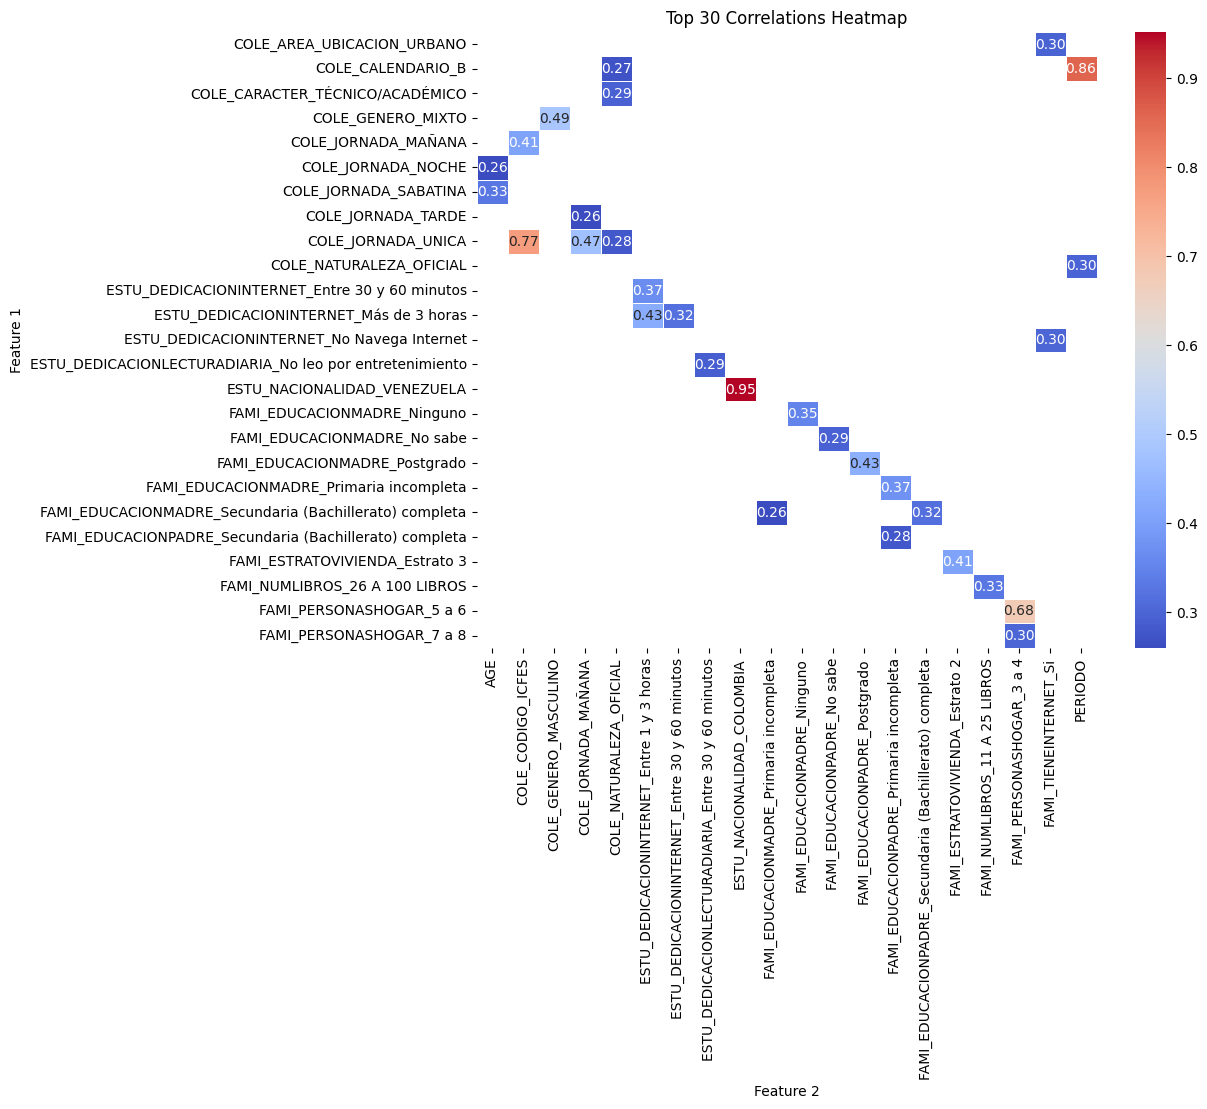

In [ ]:
# evitamos duplicaos
upper_triangle = combined_correlation_matrix.where(np.triu(np.ones(combined_correlation_matrix.shape), k=1).astype(bool))

# organizamos los valores de la matriz
sorted_corr_pairs = upper_triangle.unstack().dropna().abs().sort_values(ascending=False)

# Las 20 correlaciones mas altas
top_20_corr_pairs = sorted_corr_pairs.head(30)

# Hacer gráfico
top_20_corr_df = top_20_corr_pairs.reset_index()
top_20_corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
pivot_corr_df = top_20_corr_df.pivot(index='Feature 1', columns='Feature 2', values='Correlation')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_corr_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Top 30 Correlations Heatmap')
plt.show()

In [ ]:
#Remuevo las variables que estan muy correlacionadas segun mi grafico de correlación anterior:

# quitamos columnas
columns_to_drop = ['COLE_CODIGO_ICFES', 'ESTU_NACIONALIDAD_VENEZUELA', 'FAMI_PERSONASHOGAR_5 a 6', 'COLE_CALENDARIO_B']

# aplicamos cambios al df
saber_2020_encoded.drop(columns=columns_to_drop, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Columnas numericas que vamos a estandarizar
numeric_columns = ['AGE', 'PERIODO', 'ESTU_COD_RESIDE_DEPTO', 'COLE_COD_DEPTO_UBICACION']

# Separamos los datos para no cometer errores
numeric_data = saber_2020_encoded[numeric_columns]
categorical_data = saber_2020_encoded.drop(columns=numeric_columns)

# estandarizar numericas
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Rehacemos el dataframe
numeric_data_scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_columns, index=saber_2020_encoded.index)
saber_2020_scaled = pd.concat([numeric_data_scaled_df, categorical_data], axis=1)

display(saber_2020_scaled)

,AGE,PERIODO,ESTU_COD_RESIDE_DEPTO,COLE_COD_DEPTO_UBICACION,ESTU_NACIONALIDAD_ARABIA SAUDITA,ESTU_NACIONALIDAD_ARGENTINA,ESTU_NACIONALIDAD_ARUBA,ESTU_NACIONALIDAD_BOLIVIA,ESTU_NACIONALIDAD_BRASIL,ESTU_NACIONALIDAD_CABO VERDE,...,COLE_CALENDARIO_OTRO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_AREA_UBICACION_URBANO,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA
0,5.945341,-5.719227,-0.027011,-0.477929,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,False
1,2.576633,-5.719227,0.025911,0.728636,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,1.902892,-5.719227,-0.028665,-0.515635,False,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
3,0.555409,-5.719227,0.082141,2.010612,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
4,0.555409,-5.719227,0.049064,1.256509,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520302,-0.455204,0.174849,-0.041896,-0.817276,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
520303,1.902892,0.174849,-0.041896,-0.817276,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
520304,-0.792075,0.174849,-0.041896,-0.817276,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
520305,0.218538,0.174849,-0.041896,-0.817276,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


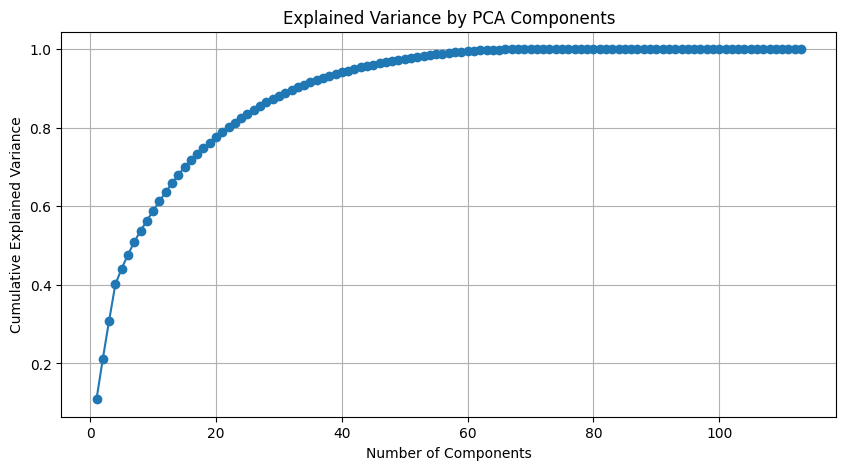

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicamos pca para bajar dimensionalidad
pca = PCA()
pca_components = pca.fit_transform(saber_2020_scaled)

# Graficamos
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Definimos la variaza a 90%
desired_variance = 0.90

# Calculamos la varianza acumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# encontrar componentes
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of components needed to reach {desired_variance*100}% variance: {num_components}")
print(pca_components.shape)

Number of components needed to reach 90.0% variance: 33
(520307, 113)


In [ ]:
import pandas as pd
import numpy as np

# Cargar componentes
pc1_loadings = pca.components_[0]

# Hacemos df
loadings_df = pd.DataFrame({
    'Feature': saber_2020_encoded.columns,
    'PC1_Loading': pc1_loadings
})

# organizamos 
sorted_loadings = loadings_df.reindex(loadings_df['PC1_Loading'].abs().sort_values(ascending=False).index)

# Display
print(sorted_loadings.head(20))

                                               Feature  PC1_Loading
1                                              PERIODO     0.710636
3                             COLE_COD_DEPTO_UBICACION    -0.535044
0                                                  AGE    -0.371284
2                                ESTU_COD_RESIDE_DEPTO    -0.231593
102                            COLE_NATURALEZA_OFICIAL     0.085691
112                                 COLE_JORNADA_UNICA     0.047780
110                              COLE_JORNADA_SABATINA    -0.030786
52                      FAMI_ESTRATOVIVIENDA_Estrato 2     0.026155
85                       FAMI_NUMLIBROS_11 A 25 LIBROS     0.022436
58                            FAMI_PERSONASHOGAR_3 a 4    -0.021584
111                                 COLE_JORNADA_TARDE     0.020666
84                     FAMI_TIENECONSOLAVIDEOJUEGOS_Si    -0.019058
109                                 COLE_JORNADA_NOCHE    -0.019008
53                      FAMI_ESTRATOVIVIENDA_Est

#### Ejecución de segmentación DBSCAN

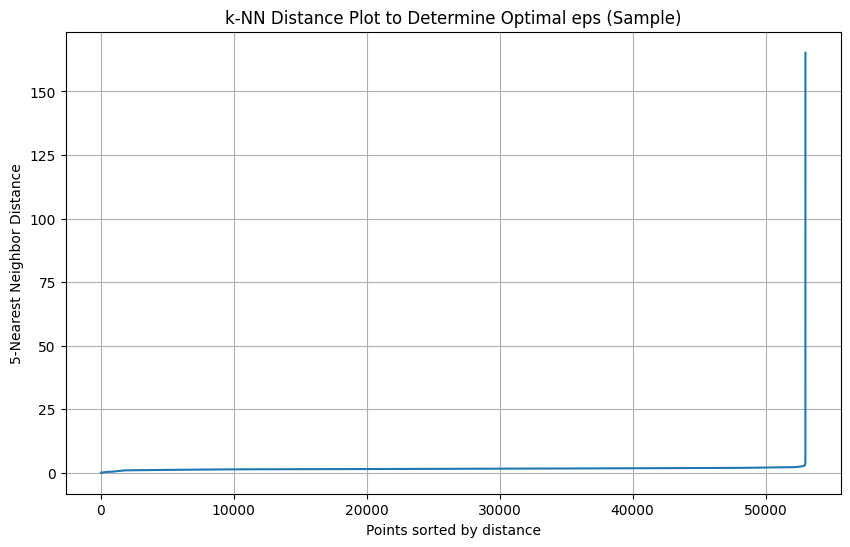

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Como son 33 componentes los ponemos
pca_33_components = pca_components[:, :33]

# Bajamos la dimensionalidad para que DBSCAN pueda funcionar (consume mucha ram)
sample_size = 53000
np.random.seed(42)  # Set seed for reproducibility
sample_indices = np.random.choice(pca_33_components.shape[0], size=sample_size, replace=False)
pca_sample = pca_33_components[sample_indices, :]

# hace k neighbours
k = 5
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(pca_sample)

# calculamos distancias e indices
distances, indices = neighbors.kneighbors(pca_sample)
distances = np.sort(distances[:, k-1])

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-Nearest Neighbor Distance')
plt.title('k-NN Distance Plot to Determine Optimal eps (Sample)')
plt.grid(True)
plt.show()

In [ ]:
#!pip install kneed
# Sacamos eps de forma automatica con kneelocator
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
eps = distances[knee.knee]
print(distances[knee.knee])

1.9212981847738406


In [ ]:
from sklearn.cluster import DBSCAN

# definimos el numero de min_samples y eps, min_samples 66 porque es el doble de los atributos que obtuvimos
optimal_eps = eps
min_samples = 66

# Utilizamos el algoritmo dbscan
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(pca_sample)

<ipython-input-61-555c7269f119>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', np.unique(dbscan_labels_no_outliers).max() + 1)


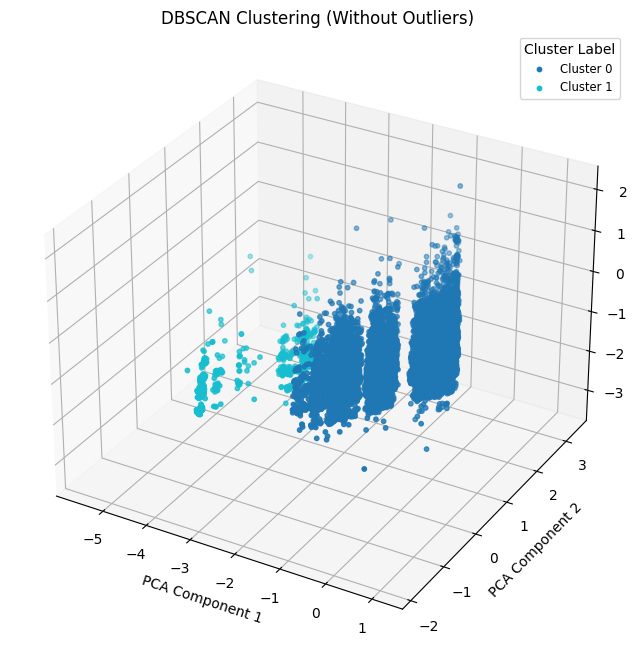

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Scamos outliers
non_outliers_mask = dbscan_labels != -1
pca_sample_no_outliers = pca_sample[non_outliers_mask]
dbscan_labels_no_outliers = dbscan_labels[non_outliers_mask]
colors = plt.cm.get_cmap('tab10', np.unique(dbscan_labels_no_outliers).max() + 1)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dividimos clusters
for cluster_label in np.unique(dbscan_labels_no_outliers):
    cluster_mask = dbscan_labels_no_outliers == cluster_label
    ax.scatter(pca_sample_no_outliers[cluster_mask, 0],
               pca_sample_no_outliers[cluster_mask, 1],
               pca_sample_no_outliers[cluster_mask, 2],
               color=colors(cluster_label), label=f'Cluster {cluster_label}', s=10)

# Graficamos
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('DBSCAN Clustering (Without Outliers)')
plt.legend(loc='upper right', title="Cluster Label", fontsize='small')
plt.show()

#### Análisis de segmentos


In [ ]:
# sacamos labels
original_labels = np.full(pca_33_components.shape[0], -1)

# Asignamos clusters
original_labels[sample_indices] = dbscan_labels

# ponemos las labels
saber_2020['Cluster_Labels'] = original_labels

In [ ]:
# Vemos la distribución de datos en los clusters (el ruido es meno porque se usaron solo 53k datos)
unique, counts = np.unique(original_labels, return_counts=True)
print(f'Cluster Labels and their Counts: {dict(zip(unique, counts))}')

Cluster Labels and their Counts: {-1: 475833, 0: 43560, 1: 914}


#### ⁠⁠Contrastar Segmentos con resultados de pruebas



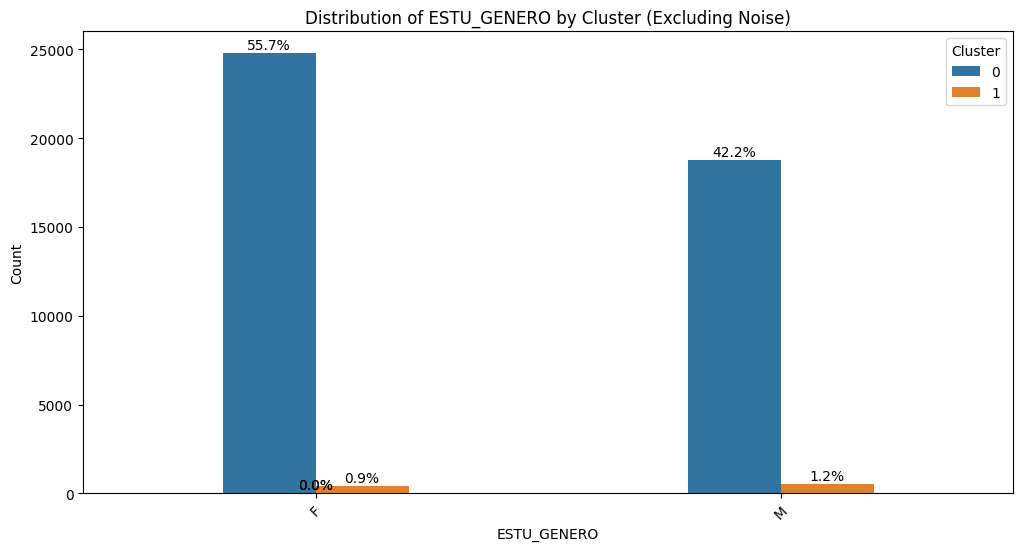

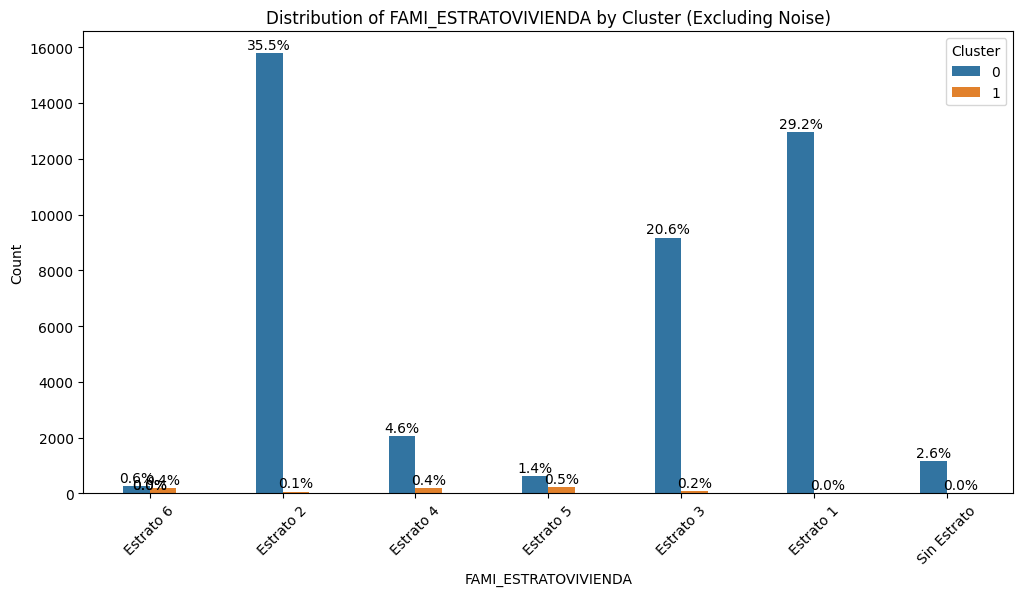

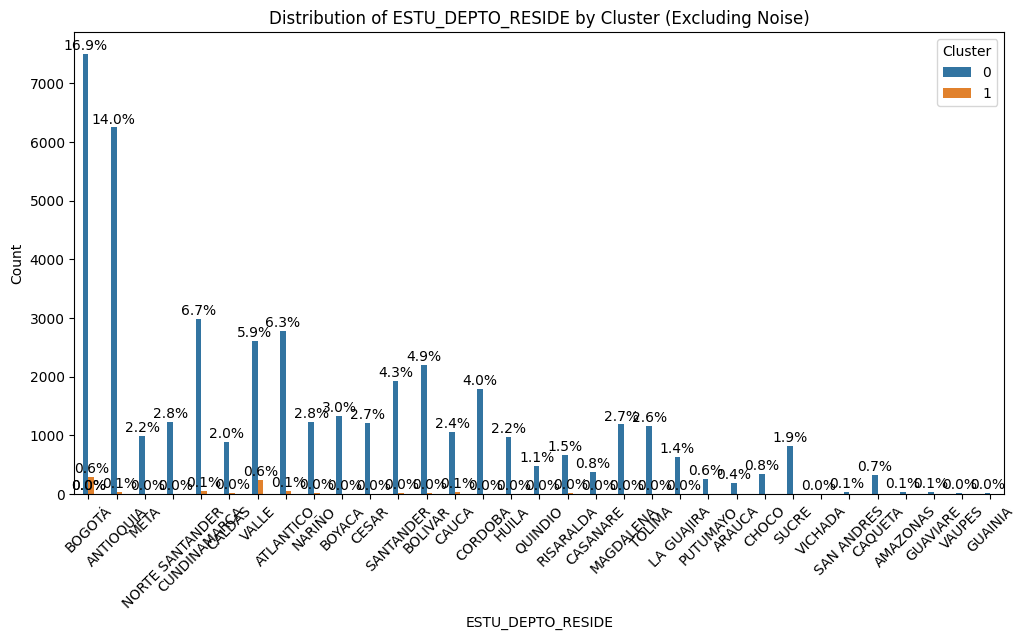

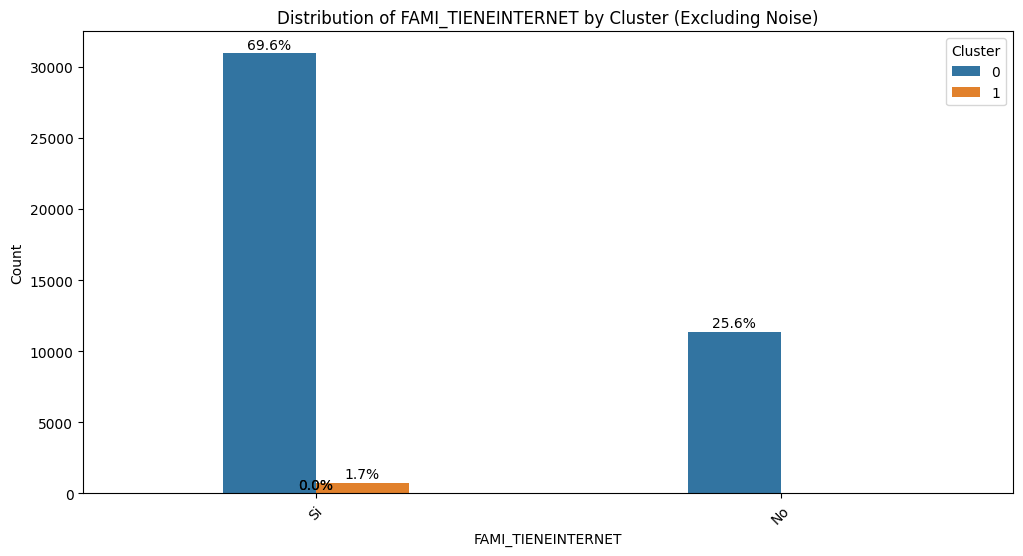

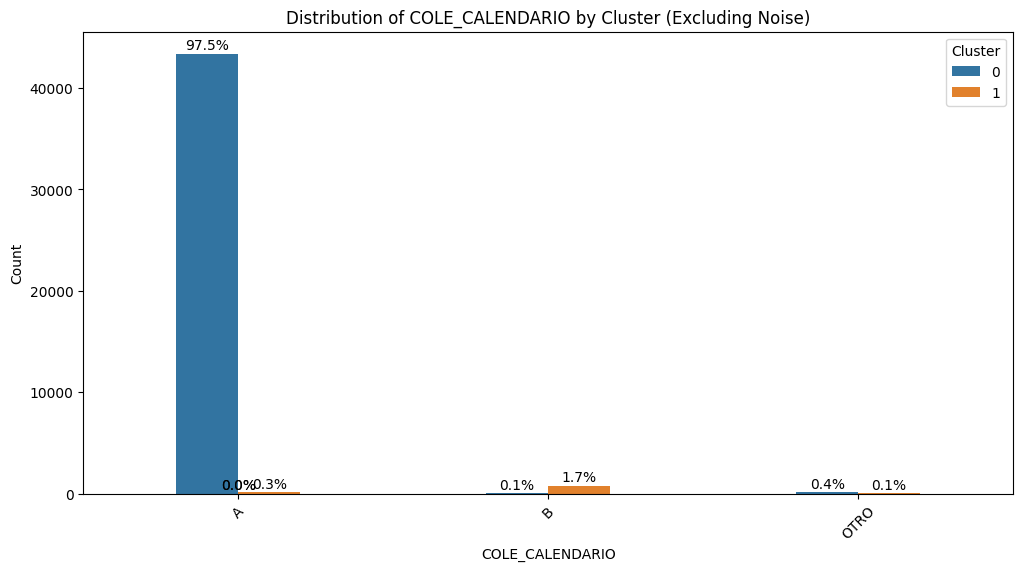

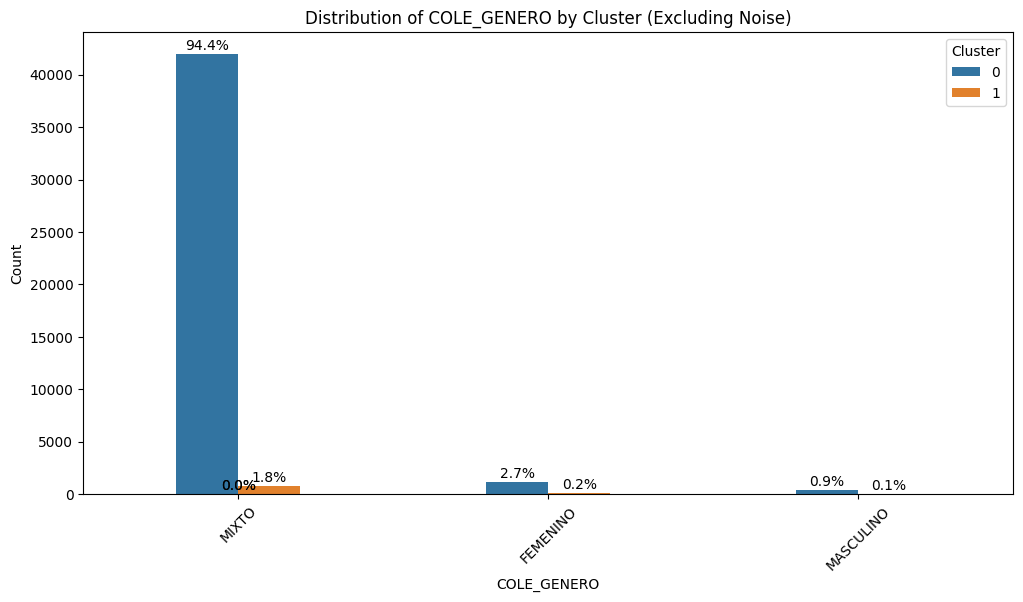

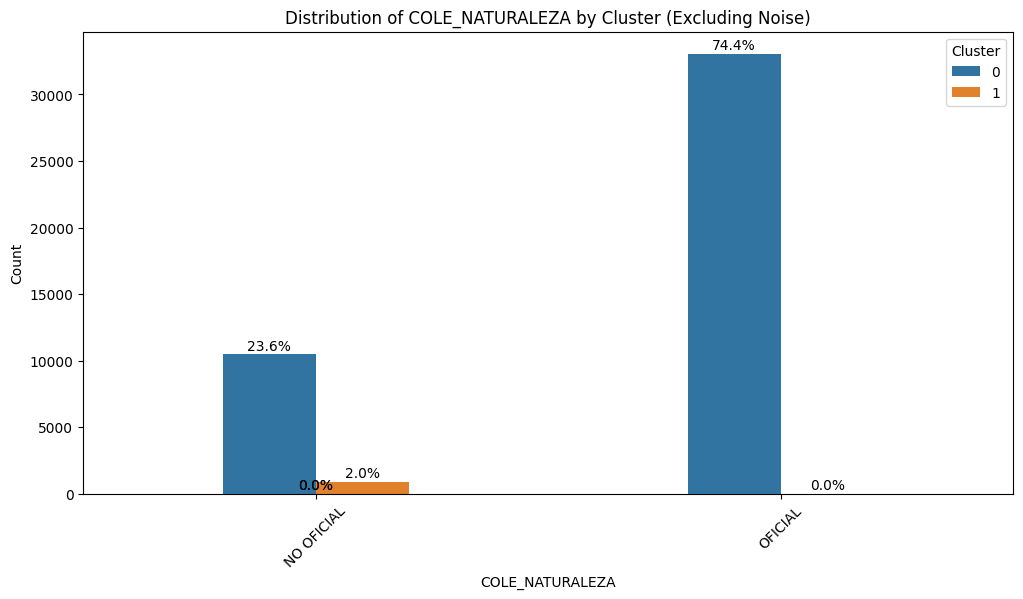

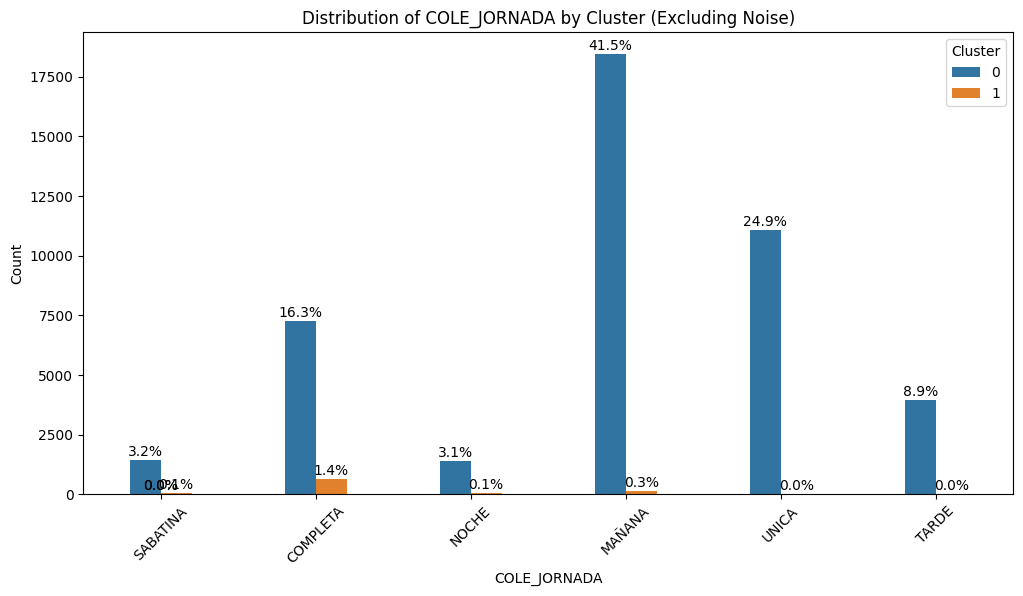

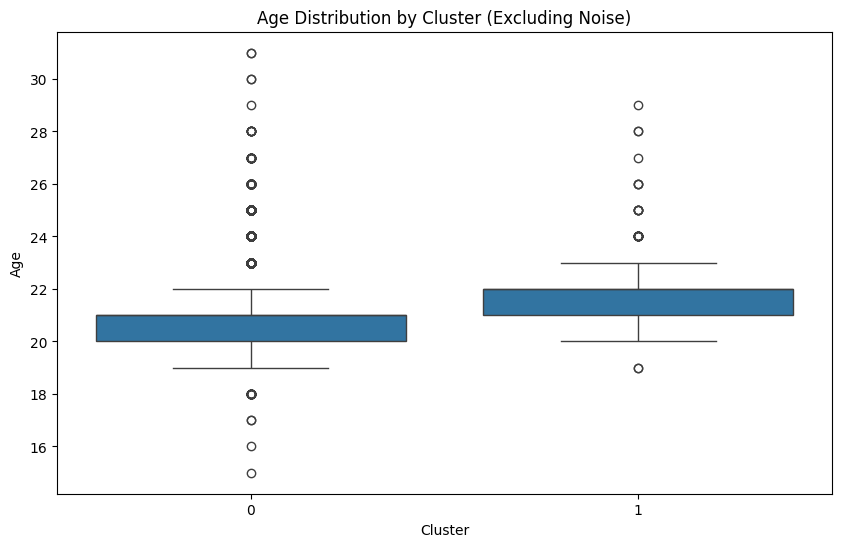

In [ ]:
# Ponemos porcentajes para graficos
def add_percentages(ax, total):
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3),
                    textcoords='offset points')

# Filtramos el ruido
filtered_df = saber_2020[saber_2020['Cluster_Labels'] != -1]

# Variables categoricas
categorical_vars = [
    'ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA', 'ESTU_DEPTO_RESIDE',
    'FAMI_TIENEINTERNET', 'COLE_CALENDARIO', 'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_JORNADA'
]

# Graficos para variables categoricas
for var in categorical_vars:
    plt.figure(figsize=(12, 6))  
    ax = sns.countplot(data=filtered_df, x=var, hue='Cluster_Labels', width=0.4, dodge=0.8) 
    total = len(filtered_df)
    add_percentages(ax, total)

    plt.title(f'Distribution of {var} by Cluster (Excluding Noise)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.show()

# Graficos para variables numericas
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Cluster_Labels', y='AGE')
plt.title('Age Distribution by Cluster (Excluding Noise)')
plt.ylabel('Age')
plt.xlabel('Cluster')
plt.show()

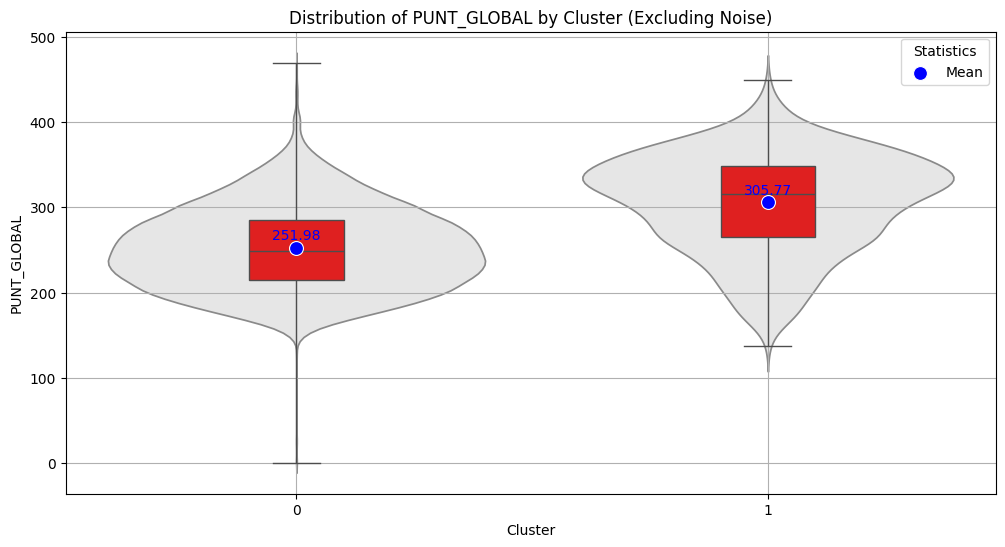

In [ ]:
# filtramos el ruido
filtered_df = saber_2020[saber_2020['Cluster_Labels'] != -1]

# Hacemos el boxplot
plt.figure(figsize=(12, 6))

# le agregamos violin plt
sns.violinplot(data=filtered_df, x='Cluster_Labels', y='PUNT_GLOBAL', inner=None, color="0.9")
sns.boxplot(data=filtered_df, x='Cluster_Labels', y='PUNT_GLOBAL', whis=[0, 100], width=0.2, color="red")

# sacamos los valores medios
mean_values = filtered_df.groupby('Cluster_Labels')['PUNT_GLOBAL'].mean().values
sns.scatterplot(x=np.arange(len(mean_values)), y=mean_values, color='blue', s=100, label='Mean', zorder=3)

# Grafico
for i, mean in enumerate(mean_values):
    plt.text(i, mean + 10.0, f'{mean:.2f}', color='blue', ha='center', fontsize=10)  # Increase the y-offset

plt.title('Distribution of PUNT_GLOBAL by Cluster (Excluding Noise)')
plt.xlabel('Cluster')
plt.ylabel('PUNT_GLOBAL')
plt.grid(True)
plt.legend(title='Statistics')
plt.show()